<a href="https://colab.research.google.com/github/JohanPL95/trabajos/blob/main/TRabajo_PNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Objetivo**

Clasificar el tipo de artritis basado en los síntomas y la información en las historias clínicas.


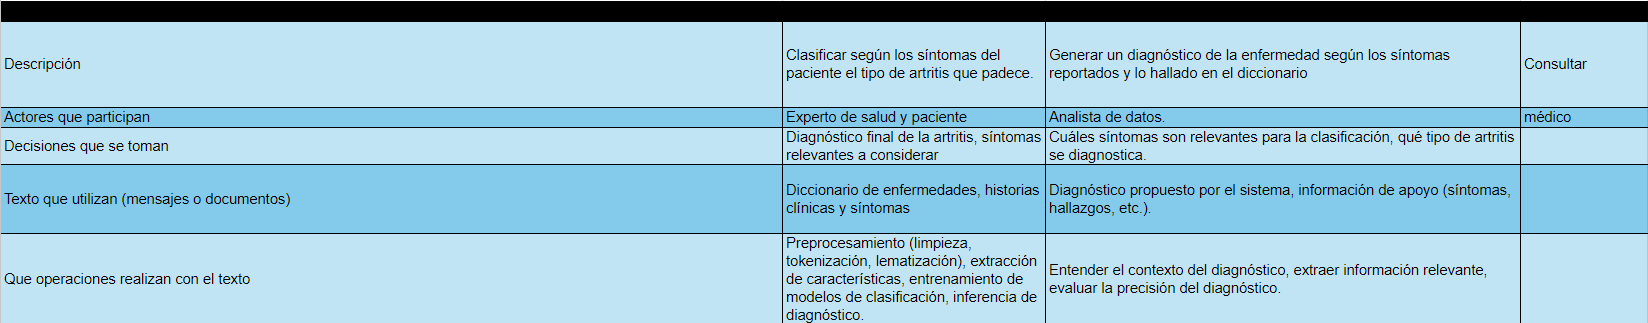

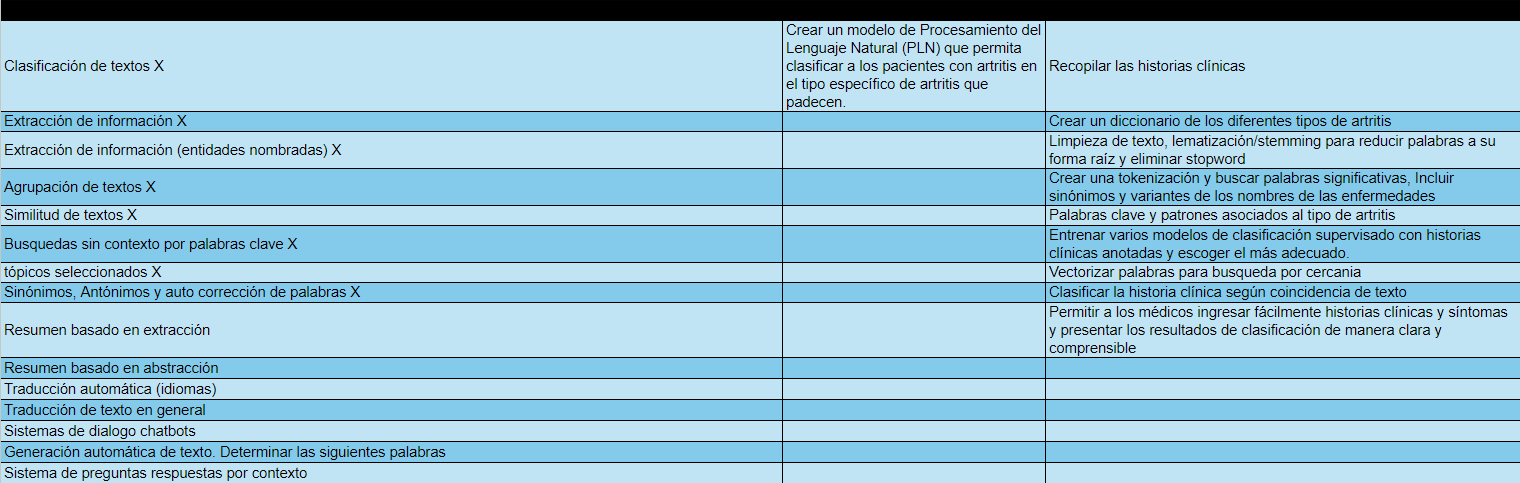

##Primer modelo, TFidf.
1. **Extracción de características**: TF-IDF puede utilizarse para convertir el texto de los artículos médicos en vectores de características numéricas. Cada dimensión del vector representa la importancia de un término específico en ese documento en relación con el corpus completo.

2. **Identificación de términos clave**: Los términos con altos puntajes TF-IDF pueden considerarse palabras clave o términos relevantes para un documento en particular. En el contexto de la artritis, estos pueden ser síntomas, tratamientos, tipos de artritis, etc.

3. **Clasificación de documentos**: Los vectores TF-IDF pueden usarse como entrada para algoritmos de aprendizaje automático supervisado, como máquinas de vectores de soporte (SVM), regresión logística, etc., para clasificar los artículos en diferentes tipos de artritis o categorías relacionadas.
Recuperación de información: TF-IDF también se utiliza en la recuperación de información, lo que permite buscar y recuperar documentos médicos relevantes para consultas específicas relacionadas con la artritis.

4. **Análisis de similitud**: Se pueden calcular similitudes entre documentos comparando sus vectores TF-IDF, lo que permite agrupar artículos médicos sobre temas similares de artritis.

In [ ]:
import pandas as pd

# Cargar el archivo .parquet
df = pd.read_parquet('train-00000-of-00001 3.parquet')

# Mostrar las primeras filas del DataFrame
print(df.head())

In [ ]:
df

,raw_text,topic,speciallity,raw_text_type,topic_type,source,country,document_id
0,Anamnesis\nSe trata de un paciente de 67 años ...,"Adenocarcinoma, SAI",,clinic_case,medical_diagnostic,1,es,1
1,Anamnesis\nSe trata de un paciente de 67 años ...,"Adenocarcinoma, SAI - grado I, bien diferenciado",,clinic_case,medical_diagnostic,1,es,1
2,Anamnesis\nSe trata de un paciente de 67 años ...,Neoplasia metastásica,,clinic_case,medical_diagnostic,1,es,1
3,Anamnesis\nSe trata de un paciente de 67 años ...,Neoplasia de benignidad o malignidad incierta,,clinic_case,medical_diagnostic,1,es,1
4,Anamnesis\nSe trata de un paciente de 67 años ...,"Adenocarcinoma metastásico, SAI",,clinic_case,medical_diagnostic,1,es,1
...,...,...,...,...,...,...,...,...
2136485,Edema bilateral de párpados superiores,Función patológica,,question,answer,13,es,100877
2136486,Carcinoma papilar urotelial de bajo grado no i...,Proceso neoplásico,,question,answer,13,es,100878
2136487,Carcinoma urotelial papilar de bajo grado no i...,Proceso neoplásico,,question,answer,13,es,100879
2136488,Postraumático,Concepto Temporal,,question,answer,13,es,100880


In [ ]:
# Filtrar las filas donde la columna "topic" contiene la palabra "artritis"
artritis_df = df[df['topic'].str.contains('artritis', case=False)]

# Mostrar el resultado
artritis_df

,raw_text,topic,speciallity,raw_text_type,topic_type,source,country,document_id
1974,\n \n Es la hinchazón e irritación (inflamació...,\n Artritis viral,,open_text,other,2,es,376
1975,\n \n Es la \n debido a una infección bacteri...,\n Artritis séptica,,open_text,other,2,es,377
1976,\n \n La artritis reumatoidea (AR) es una enfe...,\n Artritis reumatoidea,,open_text,other,2,es,378
1977,\n \n La causa exacta de la artritis reactiva ...,\n Artritis reactiva,,open_text,other,2,es,379
1978,\n \n Es un problema articular (\n ) que a men...,\n Artritis psoriásica,,open_text,other,2,es,380
1979,\n \n La artritis por pirofosfato cálcico (CPP...,\n Artritis por pirofosfato cálcico,,open_text,other,2,es,381
2022,\n \n crónicas\n Los nombres que describen es...,\n Artritis idiopática juvenil,,open_text,other,2,es,424
2023,\n \n Es una inflamación de una articulación c...,\n Artritis gonocócica,,open_text,other,2,es,425
2024,\n \n Es la hinchazón e irritación (inflamació...,\n Artritis fúngica,,open_text,other,2,es,426
2025,\n \n Es la inflamación o degeneración de una ...,\n Artritis,,open_text,other,2,es,427


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Paso 1: Cargar y preprocesar los datos
data = df[df['topic'].str.contains('artritis', case=False)]
data.dropna(subset=['raw_text', 'topic'], inplace=True)  # Eliminar filas con valores nulos
X = data['raw_text']
y = data['topic']

# Paso 2: Vectorizar el texto utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# Paso 3: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar un clasificador SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd

# Función para limpiar las líneas problemáticas
def clean_and_fix_csv(file_path, cleaned_file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    cleaned_lines = []
    current_line = []
    for line in lines:
        line = line.strip()
        if line.startswith('"') and not line.endswith('"'):
            # Inicio de una nueva entrada multi-línea
            if current_line:
                cleaned_lines.append(' '.join(current_line))
            current_line = [line]
        elif line.endswith('"'):
            # Fin de una entrada multi-línea
            current_line.append(line)
            cleaned_lines.append(' '.join(current_line))
            current_line = []
        else:
            # Parte de una entrada multi-línea
            if current_line:
                current_line.append(line)
            else:
                cleaned_lines.append(line)

    if current_line:
        cleaned_lines.append(' '.join(current_line))

    with open(cleaned_file_path, 'w', encoding='utf-8') as cleaned_file:
        for cleaned_line in cleaned_lines:
            cleaned_file.write(cleaned_line + '\n')

# Limpiar y guardar el contenido del archivo CSV
cleaned_file_path1 = "cleaned_artritis_df.csv"
cleaned_file_path2 = "cleaned_artritis_df_1.csv"

clean_and_fix_csv(file_path1, cleaned_file_path1)
clean_and_fix_csv(file_path2, cleaned_file_path2)


In [ ]:
# Leer los archivos CSV limpiados
artritis_data1 = pd.read_csv(cleaned_file_path1, sep=',', encoding='utf-8')
artritis_data2 = pd.read_csv(cleaned_file_path2, sep=',', encoding='utf-8')

# Mostrar las columnas del DataFrame para verificar los nombres
print("Columnas de cleaned_artritis_df.csv:")
print(artritis_data1.columns)

print("\nColumnas de cleaned_artritis_df_1.csv:")
print(artritis_data2.columns)

Columnas de cleaned_artritis_df.csv:
Index(['raw_text', 'topic', 'speciallity', 'raw_text_type', 'topic_type',
       'source', 'country', 'document_id'],
      dtype='object')

Columnas de cleaned_artritis_df_1.csv:
Index(['raw_text', 'topic', 'speciallity', 'raw_text_type', 'topic_type',
       'source', 'country', 'document_id'],
      dtype='object')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from IPython.display import display
import ipywidgets as widgets

# Verificar si las columnas necesarias están presentes
if 'raw_text' in artritis_data1.columns and 'topic' in artritis_data1.columns:
    # Extraer los síntomas y el tipo de artritis
    X_train = artritis_data1['raw_text']
    y_train = artritis_data1['topic']

    # Crear un pipeline para el preprocesamiento y el modelo de clasificación
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=1000)),
        ('classifier', SVC(kernel='linear'))
    ])

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)

    # Función para predecir el tipo de artritis
    def predecir_artritis(b):
        sintomas = textbox.value
        tipo_artritis = pipeline.predict([sintomas])[0]
        output_text.clear_output()
        with output_text:
            print(f"El tipo de artritis es: {tipo_artritis}")

    # Crear el widget de texto para ingresar los síntomas
    textbox = widgets.Textarea(
        value='',
        placeholder='Ingrese los síntomas aquí',
        description='Síntomas:',
        layout=widgets.Layout(width='100%', height='100px')
    )

    # Crear el botón de predicción
    button = widgets.Button(description="Predecir")
    button.on_click(predecir_artritis)

    # Crear el widget de salida para mostrar el resultado
    output_text = widgets.Output()

    # Mostrar los widgets
    display(textbox)
    display(button)
    display(output_text)
else:
    print("Las columnas 'raw_text' o 'topic' no se encuentran en artritis_data1.")

Textarea(value='', description='Síntomas:', layout=Layout(height='100px', width='100%'), placeholder='Ingrese …

Button(description='Predecir', style=ButtonStyle())

Output()

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00


##Segundo modelo, BERT

1. Carga de Datos:

Se carga un archivo CSV que contiene diagnósticos médicos y sus respectivas etiquetas de tipos de artritis.
Preprocesamiento de Texto:

Los textos en los diagnósticos son tokenizados utilizando el tokenizer de BERT. La tokenización convierte los textos en una secuencia de identificadores de tokens que el modelo BERT puede procesar.

2. Codificación de Etiquetas:

Las etiquetas textuales (tipos de artritis) se convierten a valores numéricos utilizando LabelEncoder para que puedan ser utilizadas como objetivos en la tarea de clasificación.

3.División de Datos:

Los datos se dividen en conjuntos de entrenamiento y validación para entrenar y evaluar el modelo.

4.Creación de Datasets y DataLoaders:

Se crean TensorDataset y DataLoader para manejar eficientemente los datos durante el entrenamiento.
5. Inicialización del Modelo BERT:

Se inicializa un modelo BERT para clasificación de secuencias, ajustado para el número de clases presentes en los datos.

7. Configuración del Optimizador y Scheduler:

Se configura un optimizador AdamW y un scheduler de aprendizaje para ajustar los parámetros del modelo durante el entrenamiento.

8. Entrenamiento del Modelo:

El modelo BERT se entrena en múltiples épocas, ajustando sus pesos para minimizar la pérdida de clasificación.

9. Evaluación del Modelo:

Se evalúa el modelo en un conjunto de validación para monitorizar su rendimiento y ajustar hiperparámetros si es necesario.

10. Predicción:

Una vez entrenado, el modelo puede predecir el tipo de artritis dado un nuevo diagnóstico médico.

11. Interfaz de Usuario:

Se crea una interfaz interactiva utilizando Gradio para permitir a los usuarios ingresar diagnósticos médicos y obtener predicciones del tipo de artritis.



In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report
import torch

# Cargar el archivo CSV
file_path = 'artritis_df (1).csv'
df = pd.read_csv(file_path)



In [ ]:
# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Tokenizar los textos
def tokenize_texts(texts):
    return tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=128,
        pad_to_max_length=True,
        truncation=True,
        return_tensors='pt'
    )



In [ ]:
# Tokenizar los diagnósticos
tokenized_inputs = tokenize_texts(df['raw_text'])



In [ ]:
# Dividir los datos
train_texts, val_texts, train_labels, val_labels = train_test_split(
    tokenized_inputs['input_ids'], df['topic'], test_size=0.2, random_state=42
)



In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import torch

# Cargar el archivo CSV
file_path = 'artritis_df (1).csv'  # Ajusta la ruta del archivo
df = pd.read_csv(file_path)

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los textos
def tokenize_texts(texts):
    return tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Tokenizar los diagnósticos
tokenized_inputs = tokenize_texts(df['raw_text'])

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
df['topic'] = label_encoder.fit_transform(df['topic'])

# Dividir los datos
train_texts, val_texts, train_labels, val_labels = train_test_split(
    tokenized_inputs['input_ids'], df['topic'], test_size=0.2, random_state=42
)

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(val_labels.values)

# Crear datasets y dataloaders
train_data = TensorDataset(train_texts, train_labels)
val_data = TensorDataset(val_texts, val_labels)

train_sampler = RandomSampler(train_data)
val_sampler = SequentialSampler(val_data)

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=16)

# Inicializar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(df['topic'].unique())
)

# Configurar el optimizador
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Configurar el scheduler
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

# Función de entrenamiento
def train_model(model, train_dataloader, val_dataloader, epochs):
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        total_loss = 0
        for batch in train_dataloader:
            b_input_ids, b_labels = batch
            model.zero_grad()
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)

        # Evaluación
        model.eval()
        total_eval_loss = 0
        for batch in val_dataloader:
            b_input_ids, b_labels = batch
            with torch.no_grad():
                outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(val_dataloader)

        print(f"Epoch {epoch+1}")
        print(f"Training loss: {avg_train_loss}")
        print(f"Validation loss: {avg_val_loss}")

# Llamar a la función de entrenamiento
train_model(model, train_dataloader, val_dataloader, epochs)

# Predicción y evaluación
model.eval()
predictions, true_labels = [], []

for batch in val_dataloader:
    b_input_ids, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).flatten()
    predictions.extend(preds)
    true_labels.extend(b_labels)

# Generar reporte de clasificación
report = classification_report(true_labels, predictions, output_dict=True)
print(report)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1
Training loss: 3.9265138308207193
Validation loss: 3.914313554763794
Epoch 2
Training loss: 3.7789295514424643
Validation loss: 3.9198784828186035
Epoch 3
Training loss: 3.7080634435017905
Validation loss: 3.894941806793213
Epoch 4
Training loss: 3.7364796002705893
Validation loss: 3.9355790615081787
{'6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '12': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '13': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '16': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '19': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '21': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '24': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '26': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '30': {'precision': 0.0,

In [ ]:
#modelo ajustado
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import torch

# Cargar el archivo CSV
file_path = 'artritis_df (1).csv'  # Ajusta la ruta del archivo
df = pd.read_csv(file_path)

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los textos
def tokenize_texts(texts):
    return tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

# Tokenizar los diagnósticos
tokenized_inputs = tokenize_texts(df['raw_text'])

# Convertir las etiquetas de texto a etiquetas numéricas
label_encoder = LabelEncoder()
df['topic'] = label_encoder.fit_transform(df['topic'])

# Dividir los datos
train_texts, val_texts, train_labels, val_labels = train_test_split(
    tokenized_inputs['input_ids'], df['topic'], test_size=0.2, random_state=42
)

# Convertir las etiquetas a tensores
train_labels = torch.tensor(train_labels.values)
val_labels = torch.tensor(val_labels.values)

# Crear datasets y dataloaders
train_data = TensorDataset(train_texts, train_labels)
val_data = TensorDataset(val_texts, val_labels)

train_sampler = RandomSampler(train_data)
val_sampler = SequentialSampler(val_data)

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=16)

# Inicializar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(df['topic'].unique())
)

# Configurar el optimizador
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Configurar el scheduler
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

# Función de entrenamiento
def train_model(model, train_dataloader, val_dataloader, epochs):
    for epoch in range(epochs):
        # Entrenamiento
        model.train()
        total_loss = 0
        for batch in train_dataloader:
            b_input_ids, b_labels = batch
            model.zero_grad()
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()
        avg_train_loss = total_loss / len(train_dataloader)

        # Evaluación
        model.eval()
        total_eval_loss = 0
        for batch in val_dataloader:
            b_input_ids, b_labels = batch
            with torch.no_grad():
                outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
        avg_val_loss = total_eval_loss / len(val_dataloader)

        print(f"Epoch {epoch+1}")
        print(f"Training loss: {avg_train_loss}")
        print(f"Validation loss: {avg_val_loss}")

# Llamar a la función de entrenamiento
train_model(model, train_dataloader, val_dataloader, epochs)

# Predicción y evaluación
model.eval()
predictions, true_labels = [], []

for batch in val_dataloader:
    b_input_ids, b_labels = batch
    with torch.no_grad():
        outputs = model(b_input_ids)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).flatten()
    predictions.extend(preds)
    true_labels.extend(b_labels)

# Generar reporte de clasificación
report = classification_report(true_labels, predictions, output_dict=True)
print(report)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1
Training loss: 3.9799344539642334
Validation loss: 3.826247453689575
Epoch 2
Training loss: 3.823255777359009
Validation loss: 3.821408987045288
Epoch 3
Training loss: 3.763709624608358
Validation loss: 3.828033208847046
Epoch 4
Training loss: 3.760464350382487
Validation loss: 3.8279061317443848
{'6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '12': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '13': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '16': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '17': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '19': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '25': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '30': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '33': {'precision': 0.5, 'recall': 1.0, 'f1-sc

In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta

In [ ]:
import gradio as gr
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Cargar el modelo y el tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Ajusta el número de etiquetas según tu modelo

# Función de predicción
def predict_arthritis(diagnosis):
    inputs = tokenizer(diagnosis, return_tensors="pt", padding='max_length', truncation=True, max_length=128)
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=1)
    label = predictions.item()
    label_name = label_encoder.inverse_transform([label])[0]  # Usar LabelEncoder para obtener el nombre de la etiqueta
    return label_name

# Crear la interfaz
iface = gr.Interface(
    fn=predict_arthritis,
    inputs="text",
    outputs="text",
    title="Arthritis Diagnosis Classifier",
    description="Enter a medical diagnosis to classify the type of arthritis."
)

iface.launch()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9eec06b4efaf025a3f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##Modelo 3. Topic Modeling
1. Cargar y Preprocesar los Datos:

Cargar el archivo CSV y preprocesar el texto eliminando stopwords, palabras comunes y números irrelevantes.

2. Crear el Diccionario y el Corpus:

Crear un diccionario que asigna un ID único a cada palabra y convertir los textos preprocesados en un corpus.

3. Entrenar el Modelo LDA:

Entrenar un modelo LDA con un número específico de temas.

4. Función de Predicción:

Crear una función que toma un nuevo diagnóstico, lo preprocesa y predice los temas relevantes.

5. Interfaz de Usuario:

Crear una interfaz interactiva utilizando Gradio.

In [ ]:
!pip install gensim
!pip install gradio
!pip install nltk

In [ ]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gradio as gr
import nltk
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')

# Cargar el archivo CSV
ruta_archivo = 'artritis_df (1).csv'  # Ajusta la ruta del archivo
df = pd.read_csv(ruta_archivo)

# Preprocesar los datos
stop_words = set(stopwords.words('spanish'))  # Usar stopwords en español
stop_words.update(['tema', 'artritis', 'dolor', 'pacient', 'años'] + list(map(str, range(10))))  # Agregar palabras adicionales y números a las stopwords
stemmer = SnowballStemmer('spanish')

def preprocesar(texto):
    tokens = word_tokenize(texto.lower())
    tokens = [palabra for palabra in tokens if palabra.isalpha()]
    tokens = [palabra for palabra in tokens if palabra not in stop_words]
    tokens = [stemmer.stem(palabra) for palabra in tokens]
    return tokens

df['texto_procesado'] = df['raw_text'].apply(preprocesar)

# Crear el diccionario y el corpus para LDA
diccionario = corpora.Dictionary(df['texto_procesado'])
corpus = [diccionario.doc2bow(texto) for texto in df['texto_procesado']]

# Entrenar el modelo LDA
num_temas = 10
modelo_lda = LdaModel(corpus=corpus, id2word=diccionario, num_topics=num_temas, random_state=42, update_every=1, chunksize=10, passes=10, alpha='auto', per_word_topics=True)

# Función para predecir el tema de un nuevo documento
def predecir_tema(texto):
    texto_procesado = preprocesar(texto)
    bow_vector = diccionario.doc2bow(texto_procesado)
    temas = modelo_lda.get_document_topics(bow_vector)
    tema, puntuacion = max(temas, key=lambda x: x[1])
    terminos_tema = modelo_lda.show_topic(tema, topn=30)
    terminos = [termino for termino, _ in terminos_tema]
    return f"Tema {tema}: {' '.join(terminos)}"

# Crear la interfaz
interfaz = gr.Interface(
    fn=predecir_tema,
    inputs=gr.Textbox(lines=2, placeholder="Ingresa el texto aquí..."),
    outputs="text",
    title="Modelado de Temas con LDA",
    description="Ingresa un diagnóstico médico para encontrar el tema más relevante."
)

interfaz.launch(share=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bfa86f190a053dcb4b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##Modelo 4, RAG
por peso no se puede en colab


In [ ]:
pip install transformers faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 13.2 MB/s eta 0:00:00


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.9 MB/s eta 0:00:00


In [ ]:
!pip install faiss-cpu

In [ ]:
import pandas as pd
import torch
import gradio as gr
from transformers import BertTokenizer, RagTokenizer, RagRetriever, RagSequenceForGeneration

# Cargar el archivo CSV
file_path = 'artritis_df.csv'  # Ajusta la ruta del archivo
df = pd.read_csv(file_path)

# Crear un corpus de documentos
documents = df['raw_text'].tolist()

# Inicializar el tokenizer de RAG
tokenizer = RagTokenizer.from_pretrained('facebook/rag-sequence-nq')

# Inicializar el retriever
retriever = RagRetriever.from_pretrained('facebook/rag-sequence-nq', index_name='exact', passages=documents)

# Inicializar el modelo RAG
model = RagSequenceForGeneration.from_pretrained('facebook/rag-sequence-nq', retriever=retriever)

# Función de predicción
def predecir_artritis(diagnostico):
    inputs = tokenizer(diagnostico, return_tensors="pt")
    generated_ids = model.generate(input_ids=inputs['input_ids'])
    generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

# Crear la interfaz
iface = gr.Interface(
    fn=predecir_artritis,
    inputs=gr.inputs.Textbox(lines=2, placeholder="Ingresa el diagnóstico médico aquí..."),
    outputs="text",
    title="Clasificador de Diagnóstico de Artritis",
    description="Ingresa un diagnóstico médico para clasificar el tipo de artritis."
)

# Lanzar la interfaz
iface.launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from

KeyboardInterrupt: 